In [128]:
import pandas as pd
import numpy as np
df=pd.read_csv('Pune_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Alandi Road,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Ambegaon Budruk,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Anandnagar,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Aundh,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Aundh Road,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Preprocessing 

In [129]:
df.shape

(13320, 9)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [132]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [133]:
df.drop(columns=['area_type','availability', 'society', 'balcony'], inplace=True)

In [134]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [136]:
df['location']=df['location'].fillna('Alandi Road')

In [137]:
df['size']=df['size'].fillna('2 BHK')

In [138]:
df['bath']=df['bath'].fillna(2.69)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [140]:
# handle size column 
def extract_numeric_size(value):
    # Split the string and extract the numeric part
    parts = value.split()
    for part in parts:
        if part.isdigit():
            return int(part)
    return None


In [141]:
# Step 3: Apply the function to the 'size' column
df['size'] = df['size'].apply(extract_numeric_size)

In [142]:
df.head()

,location,size,total_sqft,bath,price
0,Alandi Road,2,1056,2.0,39.07
1,Ambegaon Budruk,4,2600,5.0,120.00
2,Anandnagar,3,1440,2.0,62.00
3,Aundh,3,1521,3.0,95.00
4,Aundh Road,2,1200,2.0,51.00


In [143]:
df.rename(columns={'size': 'BHK'}, inplace=True)

In [144]:
df.head()

,location,BHK,total_sqft,bath,price
0,Alandi Road,2,1056,2.0,39.07
1,Ambegaon Budruk,4,2600,5.0,120.00
2,Anandnagar,3,1440,2.0,62.00
3,Aundh,3,1521,3.0,95.00
4,Aundh Road,2,1200,2.0,51.00


In [145]:
df.describe()

,BHK,bath,price
count,13320.000000,13320.000000,13320.000000
mean,2.802778,2.692595,112.565627
std,1.294496,1.337777,148.971674
min,1.000000,1.000000,8.000000
25%,2.000000,2.000000,50.000000
50%,3.000000,2.000000,72.000000
75%,3.000000,3.000000,120.000000
max,43.000000,40.000000,3600.000000


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   BHK         13320 non-null  int64  
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 520.4+ KB


In [147]:
df.head(10)

,location,BHK,total_sqft,bath,price
0,Alandi Road,2,1056,2.0,39.07
1,Ambegaon Budruk,4,2600,5.0,120.00
2,Anandnagar,3,1440,2.0,62.00
3,Aundh,3,1521,3.0,95.00
4,Aundh Road,2,1200,2.0,51.00
5,Balaji Nagar,2,1170,2.0,38.00
6,Baner,4,2732,4.0,204.00
7,Baner road,4,3300,4.0,600.00
8,Bhandarkar Road,3,1310,3.0,63.25
9,Bhavani Peth,6,1020,6.0,370.00


In [148]:
print(df['bath'].unique())

[ 2.    5.    3.    4.    6.    1.    9.    2.69  8.    7.   11.   10.
 14.   27.   12.   16.   40.   15.   13.   18.  ]


In [149]:
print(df['total_sqft'].unique())

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


In [150]:
def convertrange(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [151]:
df['total_sqft']=df['total_sqft'].apply(convertrange)

In [152]:
df.head()

,location,BHK,total_sqft,bath,price
0,Alandi Road,2,1056.0,2.0,39.07
1,Ambegaon Budruk,4,2600.0,5.0,120.00
2,Anandnagar,3,1440.0,2.0,62.00
3,Aundh,3,1521.0,3.0,95.00
4,Aundh Road,2,1200.0,2.0,51.00


In [153]:
print(df['total_sqft'].unique())

[1056.  2600.  1440.  ... 1258.5  774.  4689. ]


In [154]:
df.dtypes

location       object
BHK             int64
total_sqft    float64
bath          float64
price         float64
dtype: object

In [155]:
df['bath'].unique()

array([ 2.  ,  5.  ,  3.  ,  4.  ,  6.  ,  1.  ,  9.  ,  2.69,  8.  ,
        7.  , 11.  , 10.  , 14.  , 27.  , 12.  , 16.  , 40.  , 15.  ,
       13.  , 18.  ])

In [156]:
print(df['bath'].isna().sum())

0


In [157]:
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

In [158]:
df.dtypes

location       object
BHK             int64
total_sqft    float64
bath          float64
price         float64
dtype: object

In [159]:
# price per square feet
df['price_per_sqft'] = (df['price']*100000) / df['total_sqft']

In [160]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [161]:
df.describe()

,BHK,total_sqft,bath,price,price_per_sqft
count,13320.000000,13274.000000,13320.000000,13320.000000,1.327400e+04
mean,2.802778,1559.626694,2.692595,112.565627,7.907501e+03
std,1.294496,1238.405258,1.337777,148.971674,1.064296e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.266865e+03
50%,3.000000,1276.000000,2.000000,72.000000,5.434306e+03
75%,3.000000,1680.000000,3.000000,120.000000,7.311746e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.200000e+07


In [162]:
print(df['bath'].isna().sum())

0


In [163]:
med = df['bath'].median()

In [164]:
df['bath']= df['bath'].fillna(med)

In [165]:
df.describe()

,BHK,total_sqft,bath,price,price_per_sqft
count,13320.000000,13274.000000,13320.000000,13320.000000,1.327400e+04
mean,2.802778,1559.626694,2.692595,112.565627,7.907501e+03
std,1.294496,1238.405258,1.337777,148.971674,1.064296e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.266865e+03
50%,3.000000,1276.000000,2.000000,72.000000,5.434306e+03
75%,3.000000,1680.000000,3.000000,120.000000,7.311746e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.200000e+07


In [166]:
print(df['total_sqft'].isna().sum())

46


In [167]:
medi= df['total_sqft'].median()

In [168]:
df['total_sqft']= df['total_sqft'].fillna(medi)

In [169]:
df['price_per_sqft'] = (df['price']*100000) / df['total_sqft']

In [170]:
df.describe()

,BHK,total_sqft,bath,price,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.802778,1558.647202,2.692595,112.565627,7.919404e+03
std,1.294496,1236.376834,1.337777,148.971674,1.062471e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.266667e+03
50%,3.000000,1276.000000,2.000000,72.000000,5.440000e+03
75%,3.000000,1678.000000,3.000000,120.000000,7.328359e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.200000e+07


In [171]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()

In [172]:
location_count

location
Alandi Road            140
Kalyani Nagar          139
Mahatma Gandhi Road    139
Lulla Nagar            139
Laxmi Road             139
                      ... 
Sadashiv Peth          138
Raviwar Peth           138
Rasta Peth             138
Ghorpadi               138
other                    1
Name: count, Length: 97, dtype: int64

In [173]:
df.describe()

,BHK,total_sqft,bath,price,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.802778,1558.647202,2.692595,112.565627,7.919404e+03
std,1.294496,1236.376834,1.337777,148.971674,1.062471e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.266667e+03
50%,3.000000,1276.000000,2.000000,72.000000,5.440000e+03
75%,3.000000,1678.000000,3.000000,120.000000,7.328359e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.200000e+07


In [174]:
# Remove outliers from column 'total_sqft'
# Ensure that the 'total_sqft' column is numeric
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Drop rows with NaN values in 'total_sqft' (if any were introduced)
df = df.dropna(subset=['total_sqft'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['total_sqft'].quantile(0.25)
Q3 = df['total_sqft'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['total_sqft'] < lower_bound) | (df['total_sqft'] > upper_bound)]

# Print the number of outliers detected
print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 1172


In [175]:
# Remove the outliers
df = df[(df['total_sqft'] >= lower_bound) & (df['total_sqft'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df)}")


Number of rows before removing outliers: 12148
Number of rows after removing outliers: 12148


In [176]:
df.describe()

,BHK,total_sqft,bath,price,price_per_sqft
count,12148.000000,12148.000000,12148.00000,12148.000000,12148.000000
mean,2.663154,1322.771471,2.51724,87.342219,6443.196088
std,1.181678,413.466923,1.16143,71.521988,4332.037722
min,1.000000,250.000000,1.00000,8.000000,500.000000
25%,2.000000,1082.000000,2.00000,48.000000,4200.090144
50%,2.000000,1240.000000,2.00000,67.000000,5285.714286
75%,3.000000,1540.000000,3.00000,100.000000,6945.493454
max,43.000000,2540.000000,40.00000,1400.000000,176470.588235


In [177]:
# remove outliers from column 'price_per_sqft'
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers
df = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]



In [83]:
df.describe()

,BHK,total_sqft,bath,price,price_per_sqft
count,10988.000000,10988.000000,10988.00000,10988.000000,10988.000000
mean,2.500091,1318.095699,2.35648,72.647550,5377.151370
std,0.854213,390.563480,0.85003,37.611015,1755.617075
min,1.000000,276.000000,1.00000,8.000000,500.000000
25%,2.000000,1089.000000,2.00000,46.000000,4095.481879
50%,2.000000,1243.000000,2.00000,63.250000,5049.689077
75%,3.000000,1530.000000,3.00000,90.000000,6333.333333
max,14.000000,2540.000000,15.00000,270.000000,11017.661901


In [178]:
import matplotlib.pyplot as plt 

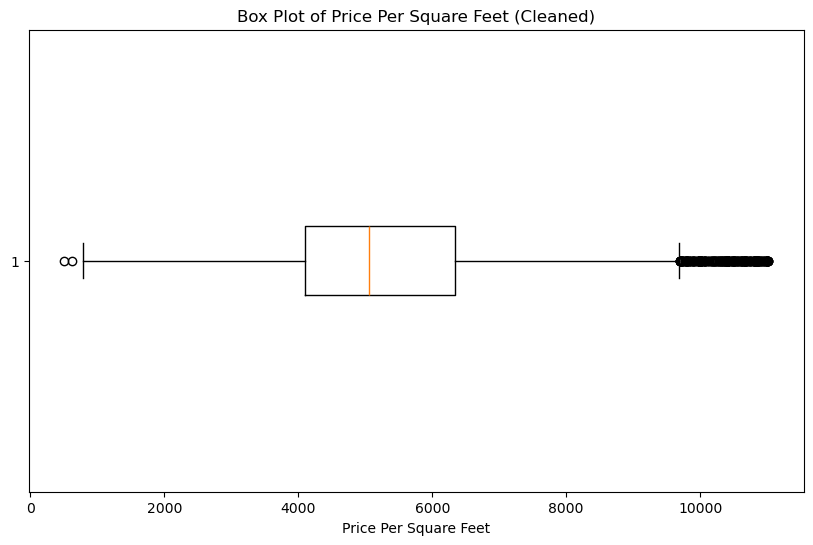

In [180]:
# box plot after removing outliers in column 'price_per_sqft'
plt.figure(figsize=(10, 6))
plt.boxplot(df['price_per_sqft'], vert=False)
plt.title('Box Plot of Price Per Square Feet (Cleaned)')
plt.xlabel('Price Per Square Feet')
plt.show()

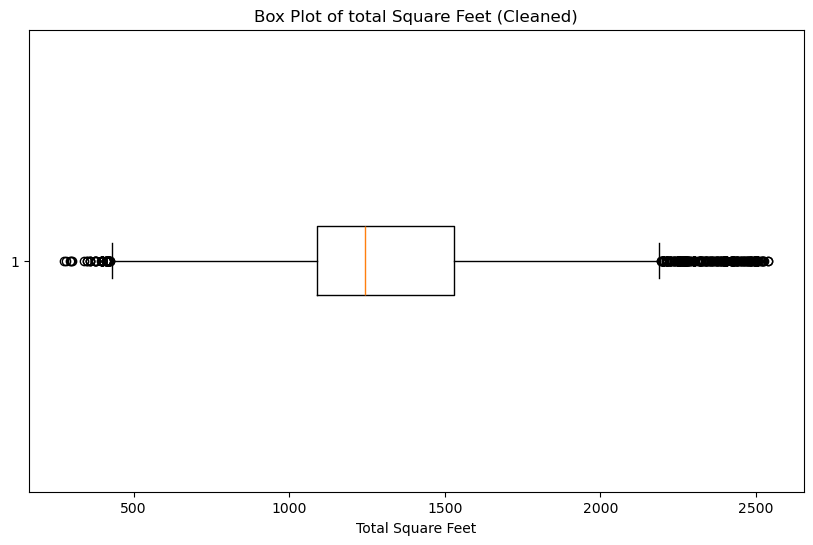

In [179]:
# box plot after removing outliers in column 'total_sqft'
plt.figure(figsize=(10, 6))
plt.boxplot(df['total_sqft'], vert=False)
plt.title('Box Plot of total Square Feet (Cleaned)')
plt.xlabel('Total Square Feet')
plt.show()

In [181]:
df.shape

(10988, 6)

In [182]:
df

,location,BHK,total_sqft,bath,price,price_per_sqft
0,Alandi Road,2,1056.0,2.0,39.07,3699.810606
2,Anandnagar,3,1440.0,2.0,62.00,4305.555556
3,Aundh,3,1521.0,3.0,95.00,6245.890861
4,Aundh Road,2,1200.0,2.0,51.00,4250.000000
5,Balaji Nagar,2,1170.0,2.0,38.00,3247.863248
...,...,...,...,...,...,...
13312,Navi Peth,2,1262.0,2.0,47.00,3724.247227
13313,Padmavati,3,1345.0,2.0,57.00,4237.918216
13314,Parvati Darshan,3,1715.0,3.0,112.00,6530.612245
13317,Pirangut,2,1141.0,2.0,60.00,5258.545136


In [183]:
df.drop(columns=['price_per_sqft'], inplace=True)

In [184]:
# cleaned data
df

,location,BHK,total_sqft,bath,price
0,Alandi Road,2,1056.0,2.0,39.07
2,Anandnagar,3,1440.0,2.0,62.00
3,Aundh,3,1521.0,3.0,95.00
4,Aundh Road,2,1200.0,2.0,51.00
5,Balaji Nagar,2,1170.0,2.0,38.00
...,...,...,...,...,...
13312,Navi Peth,2,1262.0,2.0,47.00
13313,Padmavati,3,1345.0,2.0,57.00
13314,Parvati Darshan,3,1715.0,3.0,112.00
13317,Pirangut,2,1141.0,2.0,60.00


In [185]:
df.to_csv('cleaned_data.csv')

In [186]:
x = df.drop(columns= ['price'])
y = df['price']

## import libraries

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [188]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size= 0.2, random_state = 0)

In [189]:
print (X_train.shape)
print (X_test.shape)

(8790, 4)
(2198, 4)


In [190]:
print (y_train.shape)

(8790,)


In [195]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output= False), ['location']), remainder = 'passthrough')

In [196]:
scaler = StandardScaler()

## apply linear regression

In [197]:
lr = LinearRegression()

In [198]:
pipe= make_pipeline(column_trans, scaler, lr)

In [199]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [200]:
y_pred_lr = pipe.predict(X_test)

In [201]:
r2_score(y_test, y_pred_lr)

0.6232529816509962

## apply Lasso regression 

In [202]:
lasso = Lasso()

In [203]:
pipe= make_pipeline(column_trans, scaler, lasso)

In [204]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [205]:
y_pred_lasso = pipe.predict(X_test)

In [206]:
r2_score(y_test, y_pred_lasso)

0.6253513581385926

## apply ridge regression 

In [207]:
ridge = Ridge()

In [208]:
pipe= make_pipeline(column_trans, scaler, ridge)

In [209]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [210]:
y_pred_ridge = pipe.predict(X_test)

In [211]:
r2_score(y_test, y_pred_ridge)

0.6232616935045916

In [212]:
import pickle

In [213]:
pickle.dump(pipe, open('RidgeModel.pkl', 'wb'))

In [214]:
df.head()

,location,BHK,total_sqft,bath,price
0,Alandi Road,2,1056.0,2.0,39.07
2,Anandnagar,3,1440.0,2.0,62.00
3,Aundh,3,1521.0,3.0,95.00
4,Aundh Road,2,1200.0,2.0,51.00
5,Balaji Nagar,2,1170.0,2.0,38.00
